<a href="https://colab.research.google.com/github/sightes/RNA-UBO-2023/blob/main/Ejemplo_Perceptron_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

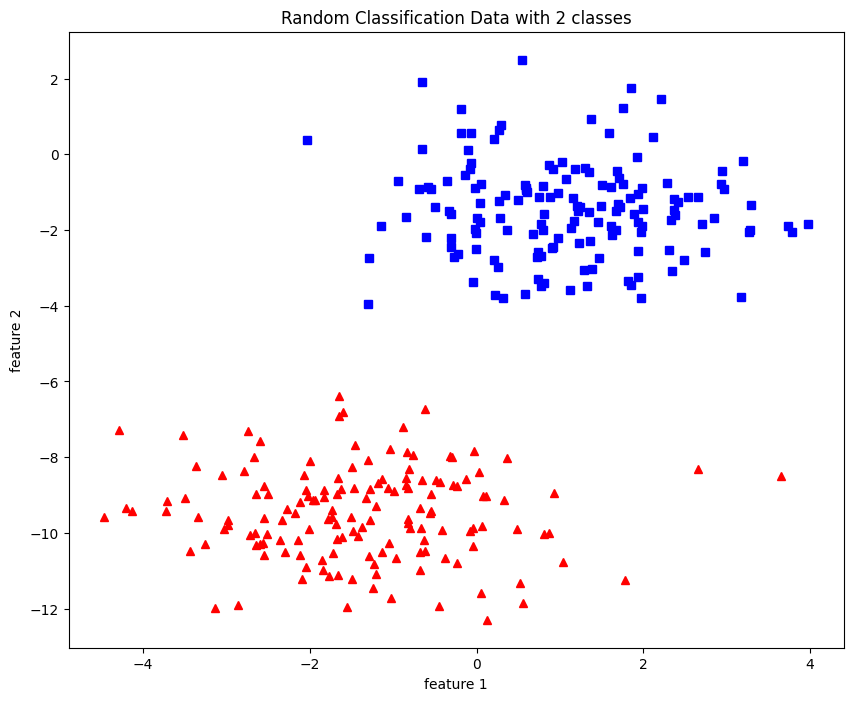

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy import random
#X=np.asarray(
#  [[0,0],
#   [0,1],
#   [1,0],
#   [1,1]])
#y=np.asarray([0,1,0,1])

X,y= datasets.make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.2,random_state=2)
fig=plt.figure(figsize=(10,8))
plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
def step_func(z):
  return 1.0 if (z>0) else 0.0

def perceptron(X,y,a,epochs):
     m,n=X.shape
    # w=np.zeros((n+1,1))
     w=random.rand(n+1, 1)
     historical_w=[]
     miss=[]
     for epoch in range(epochs):
      miss_i=0
      for idx, x_i in enumerate(X):
        x_i=np.insert(x_i,0,1).reshape(-1,1)
        y_hat=step_func(np.dot(x_i.T,w))
        if (np.squeeze(y_hat)-y[idx]) !=0 :
          w += a* ((y[idx]-y_hat)*x_i)
          miss_i +=1
        historical_w=historical_w+[[epoch]+w.transpose()[0].tolist()]
      miss.append(miss_i)
     return w, miss ,historical_w

In [ ]:
w,miss,historical_w=perceptron(X,y,0.05,20)

Text(0.5, 1.0, 'Weight Evolution')

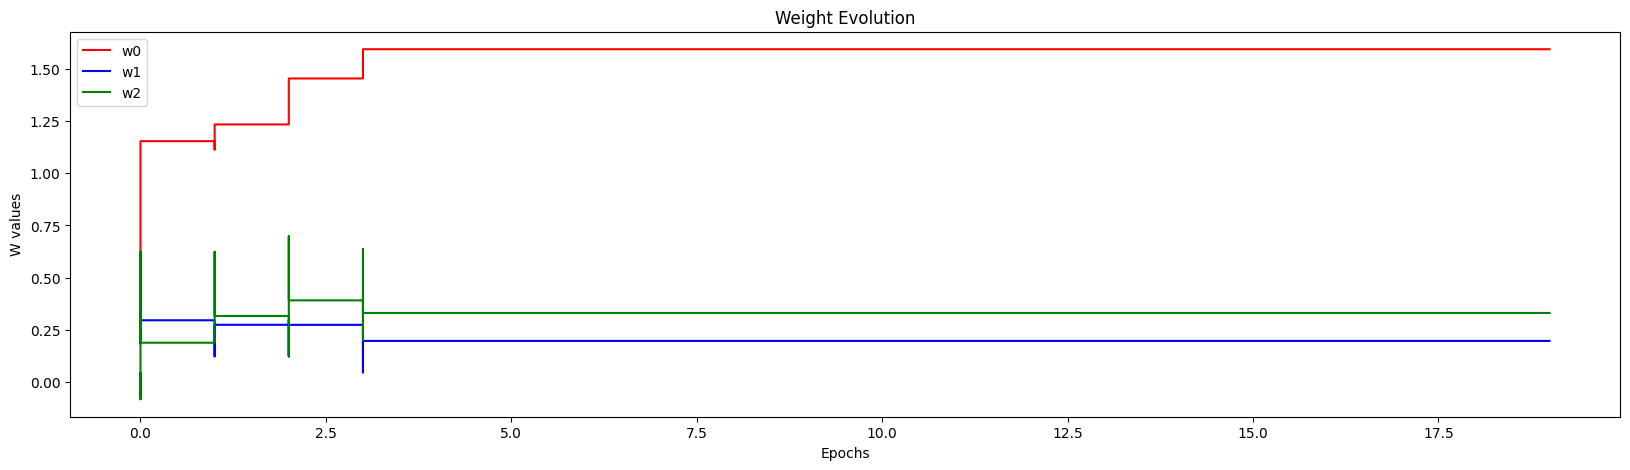

In [ ]:
import pandas as pd
df=pd.DataFrame(historical_w,columns=['epoch','w0','w1','w2'])
fig=plt.figure(figsize=(20,5))
plt.plot(df['epoch'],df['w0'],'r')
plt.plot(df['epoch'],df['w1'],'b')
plt.plot(df['epoch'],df['w2'],'g')
plt.legend(['w0','w1','w2'])
plt.xlabel("Epochs")
plt.ylabel("W values")
plt.title('Weight Evolution')

Text(0.5, 1.0, 'miss Evolution')

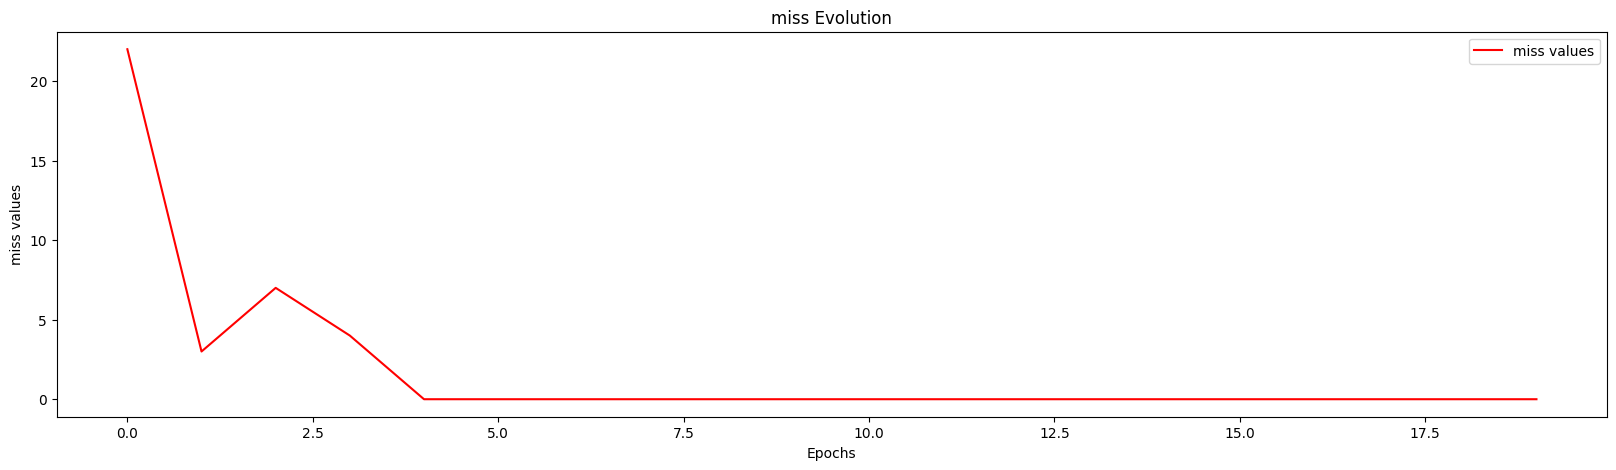

In [ ]:
import pandas as pd
df=pd.DataFrame(historical_w,columns=['epoch','w0','w1','w2'])
fig=plt.figure(figsize=(20,5))
plt.plot(miss,'r')
plt.legend(['miss values'])
plt.xlabel("Epochs")
plt.ylabel("miss values")
plt.title('miss Evolution')

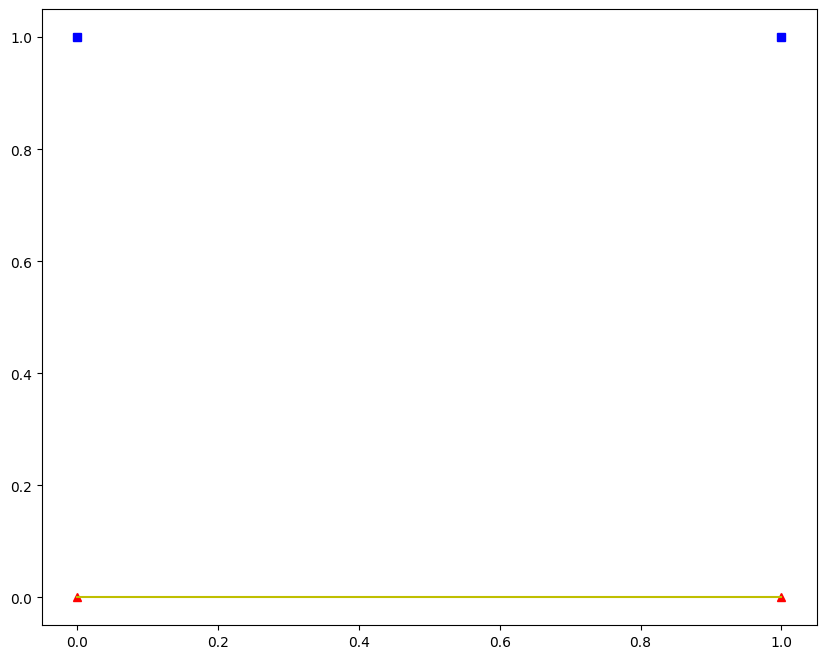

In [ ]:
x1=[min(X[:,0]) ,max(X[:,0])]
m=-w[1]/w[2]
c=-w[0]/w[2]
x2=m*x1+c
fig=plt.figure(figsize=(10,8))
plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(x1,x2,'y-')